In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Loan_prediction/train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# for i in range(0,len(df['Credit_History'])):
    # if(df['Credit_History'][i]!=1.0 or df['Credit_History'][i]!=0.0):
        # if(df['Loan_Sta|tus'][i] == 'Y'):
          # df['Credit_History'][i]=1.0
        # elif(df['Loan_Status'][i] == 'N'):
          # df['Credit_History']=0.0


In [ ]:
df['Credit_History'].isnull().sum()

50

In [ ]:
df2=df.dropna()

In [ ]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
le=LabelEncoder()
Cat=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Credit_History']
for col in Cat:
  df2[col]= le.fit_transform(df2[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1


In [ ]:

df2=df2.reset_index()

In [ ]:
count_male=0
count_female=0
count_male_n=0
count_female_n=0

for i in range(0, len(df2['Gender'])):
  if(df2['Gender'][i]==1 and df2['Loan_Status'][i]==1):
     count_male+=1
  elif(df2['Gender'][i]==0 and df2['Loan_Status'][i]==1):
     count_female+=1
  elif(df2['Gender'][i]==0 and df2['Loan_Status'][i]==0):
     count_female_n+=1
  elif(df2['Gender'][i]==1 and df2['Loan_Status'][i]==0):
     count_male_n+=1

print("count_male: ",count_male)
print("count_female: ",count_female)
print("count_male_n: ",count_male_n)
print("count_female_n: ",count_female_n)

count_male:  278
count_female:  54
count_male_n:  116
count_female_n:  32


In [ ]:
count_Married=0
count_feMarried=0
count_Married_n=0
count_feMarried_n=0

for i in range(0, len(df2['Married'])):
  if(df2['Married'][i]==1 and df2['Loan_Status'][i]==1):
     count_Married+=1
  elif(df2['Married'][i]==0 and df2['Loan_Status'][i]==1):
     count_feMarried+=1
  elif(df2['Married'][i]==0 and df2['Loan_Status'][i]==0):
     count_feMarried_n+=1
  elif(df2['Married'][i]==1 and df2['Loan_Status'][i]==0):
     count_Married_n+=1

print("count_Married: ",count_Married)
print("count_feMarried: ",count_feMarried)
print("count_Married_n: ",count_Married_n)
print("count_feMarried_n: ",count_feMarried_n)

count_Married:  227
count_feMarried:  105
count_Married_n:  84
count_feMarried_n:  64


In [ ]:
count_Edu=0
count_NotEdu=0
count_Edu_n=0
count_NotEdu_n=0

for i in range(0, len(df2['Education'])):
  if(df2['Education'][i]==1 and df2['Loan_Status'][i]==1):
     count_Edu+=1
  elif(df2['Education'][i]==0 and df2['Loan_Status'][i]==1):
     count_NotEdu+=1
  elif(df2['Education'][i]==0 and df2['Loan_Status'][i]==0):
     count_NotEdu_n+=1
  elif(df2['Education'][i]==1 and df2['Loan_Status'][i]==0):
     count_Edu_n+=1

print("count_Edu: ",count_Edu)
print("count_NotEdu: ",count_NotEdu)
print("count_Edu_n: ",count_Edu_n)
print("count_NotEdu_n: ",count_NotEdu_n)

count_Edu:  61
count_NotEdu:  271
count_Edu_n:  36
count_NotEdu_n:  112


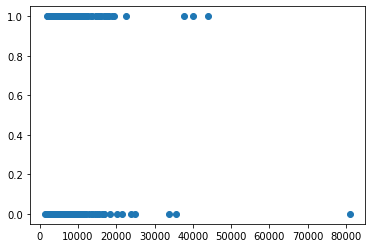

In [ ]:

df2['merge_income'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']
plt.scatter(df2['merge_income'] , df2['Loan_Status'])
plt.show()

In [ ]:
df2['load'] = ((df2['LoanAmount']*1000/ df2['Loan_Amount_Term']))/df2['merge_income']

In [ ]:
df2['area_vs_loan'] = (df2['LoanAmount']*1000) / df2['Property_Area']

In [ ]:
df2.corr()

,index,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,merge_income,load,area_vs_loan
index,1.000000,-0.023341,0.006159,0.028603,0.050167,0.039398,-0.011477,0.049782,-0.004592,-0.018582,-0.198361,0.040080,0.032374,0.042220,0.070725
Gender,-0.023341,1.000000,0.349424,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504,0.099472,-0.068583,-0.000401
Married,0.006159,0.349424,1.000000,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321,0.080003,-0.016050,0.173011
Education,0.028603,0.059245,0.001652,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437,-0.157209,0.071562,-0.124409
Self_Employed,0.050167,-0.002761,0.015674,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715,0.161492,-0.051810,0.061719
ApplicantIncome,0.039398,0.032644,0.036717,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152,0.900097,-0.133685,0.433967
CoapplicantIncome,-0.011477,0.156171,0.102950,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020,0.331580,-0.086739,0.126826
LoanAmount,0.049782,0.098975,0.183442,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753,0.553914,0.050609,0.867066
Loan_Amount_Term,-0.004592,-0.088704,-0.107504,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798,-0.012822,-0.512846,0.051243
Credit_History,-0.018582,0.022447,0.029095,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390,-0.057126,0.006409,-0.045562


In [ ]:
df2

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,merge_income,load,area_vs_loan
0,1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,6091.0,0.058374,inf
1,2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1,3000.0,0.061111,33000.0
2,3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1,4941.0,0.067463,60000.0
3,4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1,6000.0,0.065278,70500.0
4,5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1,9613.0,0.077152,133500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1,2900.0,0.068008,inf
476,610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1,0,1,4106.0,0.054121,inf
477,611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1,8312.0,0.084550,126500.0
478,612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1,7583.0,0.068501,93500.0


In [ ]:
Id = df2['Loan_ID']
df2= df2.drop(columns=['index','Loan_ID'])

In [ ]:
for i in range(0, len(df['Dependents'])):
  if(df['Dependents'][i]!='0' or df['Dependents'][i]!='1' or df['Dependents'][i]!='2'):
    df['Dependents'][i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,merge_income,load,area_vs_loan
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,6091.0,0.058374,inf
1,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1,3000.0,0.061111,33000.0
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1,4941.0,0.067463,60000.0
3,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1,6000.0,0.065278,70500.0
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1,9613.0,0.077152,133500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1,2900.0,0.068008,inf
476,1,1,3+,0,0,4106,0.0,40.0,180.0,1,0,1,4106.0,0.054121,inf
477,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1,8312.0,0.084550,126500.0
478,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1,7583.0,0.068501,93500.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
df2 = df2.drop(columns=['Dependents'])

In [ ]:
df2= df2.values
df2 = df2.astype(float)

In [ ]:
y= df2[:,-1]
X= df2[:,:-1]

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
df2.isnull.sum()

AttributeError: ignored

In [ ]:
X_train

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 2.75500000e+03, 7.86448881e-02],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 5.20300000e+03, 8.16836441e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.43500000e+03, 8.55578371e-02],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 5.25100000e+03, 6.66539707e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 7.20000000e+03, 4.62962963e-02],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 8.66700000e+03, 7.56381165e-02]])

In [ ]:
model = SelectKBest(score_func=chi2, k=4)
model.fit(X_train , y_train)
# X_train_chi = model.fit_transform(X_train, y_train)
X_test_chi = model.transform(X_test)

ValueError: ignored